In [1]:
import pandas as pd
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Theta can be between 0 and 360 in 45 degree increments
def GLCM(image, d=1, theta=0):
    
    img = np.array(image).astype(np.uint8)
    
    assert theta >= 0 and theta <= 360 and theta % 45 == 0
    assert len(img.shape) == 2
    
    

    rows, cols = img.shape
    
    #dictionary of possible angles mapped to their vectors
    vectors = {0: [1, 0], 45: [1, 1], 90: [0, 1], 135: [-1, 1], 180: [-1, 0], 
               225: [-1, -1], 270: [-1, 0], 315: [1, -1]}
    
    curr_vec = d * vectors[theta]
    
    max_val = 0 
    for i in range(rows):
        for j in range(cols):
            if img[i, j] > max_val:
                max_val = img[i, j]
    
    comatrix = np.zeros((int(max_val+1), int(max_val+1)))
    
    x, y = curr_vec
    for i in range(rows-y):
        for j in range(cols-x):
            curr_pix = img[i, j]
            co_pix = img[i+y, j+x]
            comatrix[curr_pix, co_pix]+=1
            
    
    return comatrix
    

In [3]:
#Running GLCM tests with matrices in class slides and attempting different angles
def problem1_tests():

    
    test_arr = np.array([[0, 0, 1, 1], 
                         [0, 0, 1, 1], 
                         [0, 2, 2, 2], 
                         [2, 2, 3, 3]])
    
    expected1 = np.array([[2, 2, 1, 0], 
                          [0, 2, 0, 0], 
                          [0, 0, 3, 1], 
                          [0, 0, 0, 1]])
    
    test1 = GLCM(test_arr)
    assert np.array_equal(test1, expected1)
    print("Test 1 passed")
    
    expected2 = np.array([[3, 0, 2, 0], 
                          [0, 2, 2, 0], 
                          [0, 0, 1, 2], 
                          [0, 0, 0, 0]])
    
    test2 = GLCM(test_arr, theta=90)
    assert np.array_equal(test2, expected2)
    print("Test 2 passed")
    

problem1_tests()

Test 1 passed
Test 2 passed


In [4]:
def LBP(image):
    assert len(image.shape) == 2
    img = np.array(image)
    rows, cols = img.shape
    result = np.zeros((rows-1, cols-1))
    #Iterates through pixels in original image and checks surrounding neighborhoods
    for pixh in range(1, rows-1):
        for pixw in range(1, cols-1):
            curr = img[pixh, pixw]
            neighbor_list = [img[pixh-1, pixw-1], img[pixh-1, pixw], img[pixh-1, pixw+1], img[pixh, pixw-1],
                            img[pixh, pixw+1], img[pixh+1, pixw-1], img[pixh+1, pixw], img[pixh+1, pixw+1]]
            temp = 0
            for i in range(7, -1, -1):
                if curr > neighbor_list[7-i]:
                    temp += 2**i
            result[pixh-1, pixw-1] = temp        
    return result

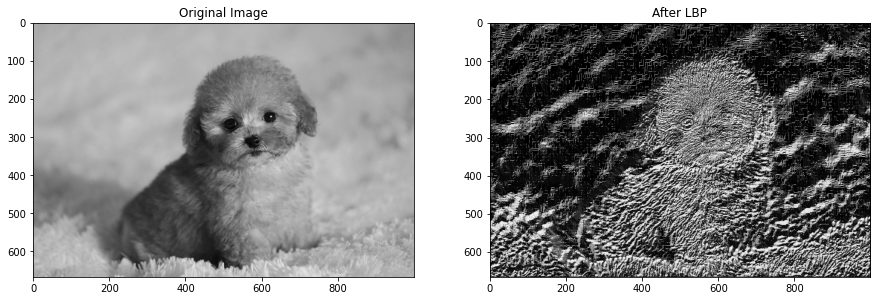

In [5]:
def problem2(image_path):
    image = cv2.imread(image_path, 0)
    out = LBP(image)
    
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].title.set_text("Original Image")
    axes[0].imshow(image, cmap="gray")
    axes[1].title.set_text("After LBP")
    axes[1].imshow(out, cmap="gray")
    
    
problem2("test.jpg")

In [6]:
def cluster_LBP(image, k):
    
    lbp = LBP(image)
    vectorized = lbp.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, random_state=0).fit(vectorized)
    clustered = kmeans.cluster_centers_[kmeans.labels_]
    
    result = clustered.reshape(lbp.shape)
    
    return result
    

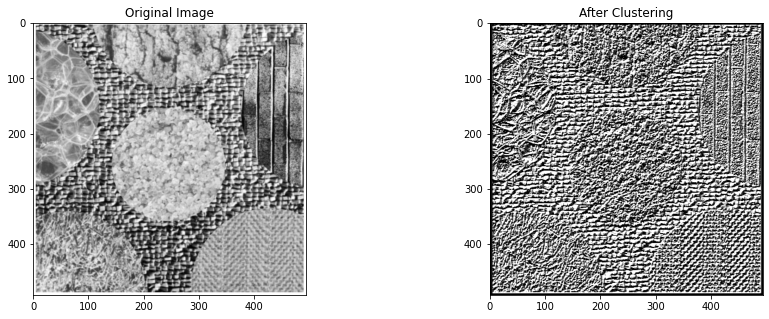

In [7]:
def problem3(image_path, k):
    
    image = cv2.imread(image_path, 0)
    out = cluster_LBP(image, k)
    
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].title.set_text("Original Image")
    axes[0].imshow(image, cmap="gray")
    axes[1].title.set_text("After Clustering")
    axes[1].imshow(out, cmap="gray")

problem3("preview.png", 5)